In [1]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")


Libraries imported successfully!
TensorFlow version: 2.19.0


In [2]:
# Cell 2 Alternative: Upload with file preview
from google.colab import files
import pandas as pd
import io

# Upload the file
uploaded = files.upload()

# Show uploaded files
print("Uploaded files:")
for filename in uploaded.keys():
    print(f" - {filename} ({len(uploaded[filename])} bytes)")

# Load the dataset
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

print(f"\nDataset '{filename}' loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

Saving AI_Symptom_Checker_Dataset.csv to AI_Symptom_Checker_Dataset.csv
Uploaded files:
 - AI_Symptom_Checker_Dataset.csv (60703 bytes)

Dataset 'AI_Symptom_Checker_Dataset.csv' loaded successfully!
Shape: (1000, 7)
Columns: ['Patient ID', 'Age', 'Gender', 'Symptoms', 'Predicted Disease', 'Severity', 'Confidence Score (%)']


In [3]:
# Cell 3: Initial data exploration
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (1000, 7)

First 5 rows:
   Patient ID  Age  Gender                    Symptoms Predicted Disease  \
0           1   69    Male    Headache, Blurred Vision          Migraine   
1           2   28  Female    Headache, Blurred Vision          Migraine   
2           3   68  Female       Fever, Cough, Fatigue         Influenza   
3           4   83    Male        Runny Nose, Sneezing       Common Cold   
4           5    9    Male  Chest Pain, Breathlessness      Heart Attack   

  Severity  Confidence Score (%)  
0   Severe                    70  
1   Severe                    95  
2     Mild                    89  
3     Mild                    77  
4     Mild                    93  


In [4]:
# Cell 4: Basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nColumn Names:")
print(df.columns.tolist())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient ID            1000 non-null   int64 
 1   Age                   1000 non-null   int64 
 2   Gender                1000 non-null   object
 3   Symptoms              1000 non-null   object
 4   Predicted Disease     1000 non-null   object
 5   Severity              1000 non-null   object
 6   Confidence Score (%)  1000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 54.8+ KB
None

Column Names:
['Patient ID', 'Age', 'Gender', 'Symptoms', 'Predicted Disease', 'Severity', 'Confidence Score (%)']


In [5]:
# Cell 5: Check for missing values
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
Patient ID              0
Age                     0
Gender                  0
Symptoms                0
Predicted Disease       0
Severity                0
Confidence Score (%)    0
dtype: int64


In [6]:
# Cell 6: Statistical summary
print("Statistical Summary:")
print(df.describe())

Statistical Summary:
        Patient ID          Age  Confidence Score (%)
count  1000.000000  1000.000000           1000.000000
mean    500.500000    45.168000             85.297000
std     288.819436    25.656072              8.902024
min       1.000000     1.000000             70.000000
25%     250.750000    23.000000             78.000000
50%     500.500000    44.500000             86.000000
75%     750.250000    67.000000             93.000000
max    1000.000000    90.000000            100.000000


In [8]:
# Cell 7: Check unique values in categorical columns
print("Unique values in categorical columns:")
print("Gender:", df['Gender'].unique())
print("Predicted Disease:", df['Predicted Disease'].unique())
print("Severity:", df['Severity'].unique())

Unique values in categorical columns:
Gender: ['Male' 'Female']
Predicted Disease: ['Migraine' 'Influenza' 'Common Cold' 'Heart Attack' 'Food Poisoning']
Severity: ['Severe' 'Mild' 'Moderate']


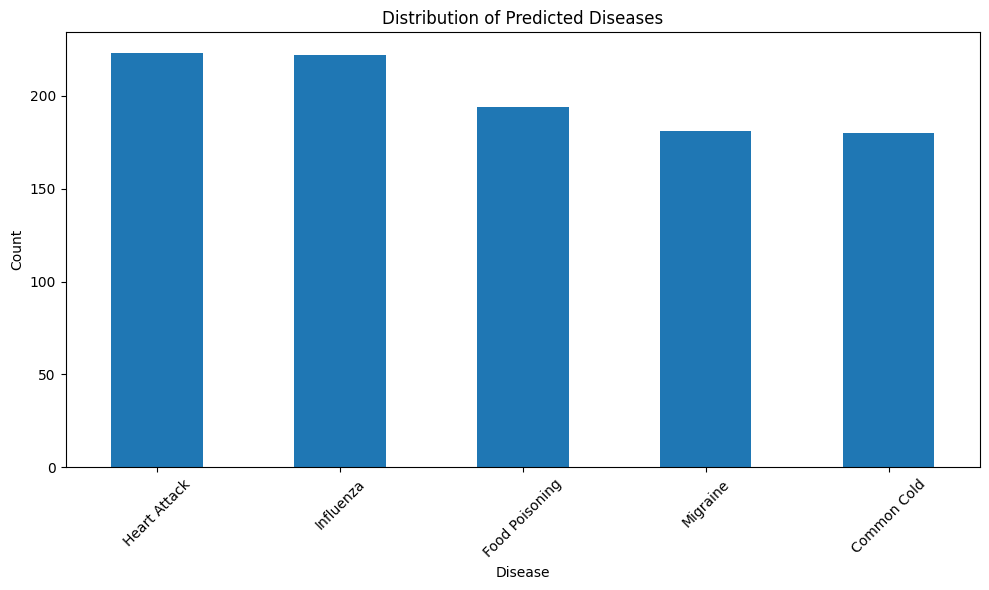

In [9]:
# Cell 8: Distribution of target variable (Predicted Disease)
plt.figure(figsize=(10, 6))
df['Predicted Disease'].value_counts().plot(kind='bar')
plt.title('Distribution of Predicted Diseases')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

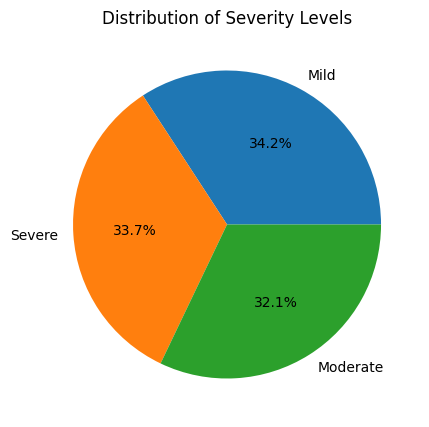

In [10]:
# Cell 9: Distribution of severity
plt.figure(figsize=(8, 5))
df['Severity'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Severity Levels')
plt.ylabel('')
plt.show()

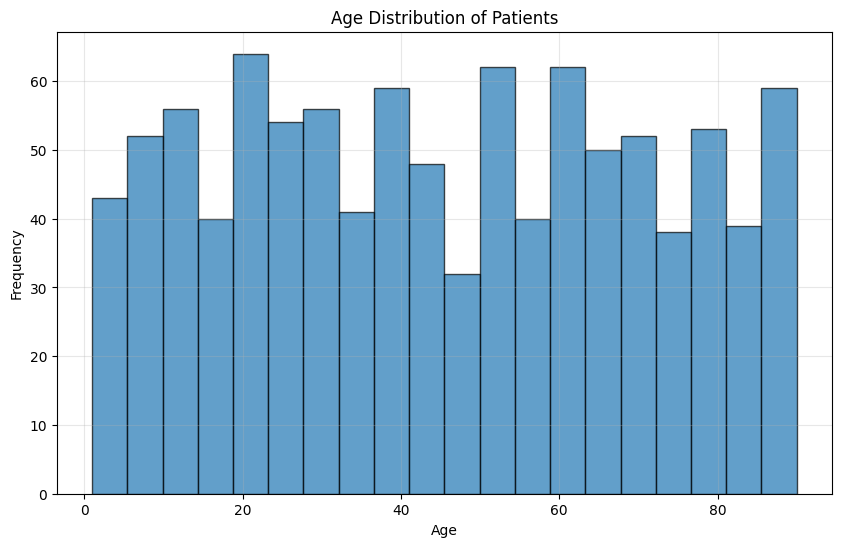

In [11]:
# Cell 10: Age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

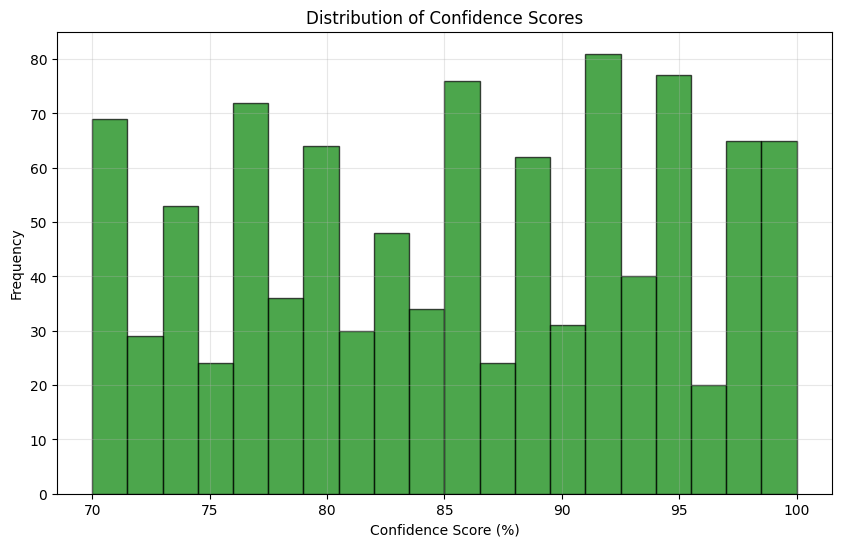

In [12]:
# Cell 11: Confidence score distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Confidence Score (%)'], bins=20, edgecolor='black', alpha=0.7, color='green')
plt.title('Distribution of Confidence Scores')
plt.xlabel('Confidence Score (%)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

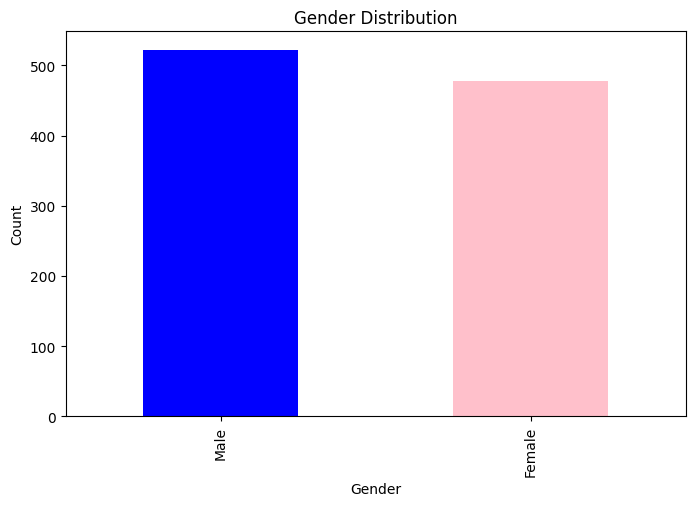

In [13]:
# Cell 12: Gender distribution
plt.figure(figsize=(8, 5))
df['Gender'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [14]:
# Cell 13: Sample of symptoms data
print("Sample Symptoms:")
print(df['Symptoms'].head(10))

Sample Symptoms:
0      Headache, Blurred Vision
1      Headache, Blurred Vision
2         Fever, Cough, Fatigue
3          Runny Nose, Sneezing
4    Chest Pain, Breathlessness
5          Runny Nose, Sneezing
6      Abdominal Pain, Vomiting
7         Fever, Cough, Fatigue
8         Fever, Cough, Fatigue
9    Chest Pain, Breathlessness
Name: Symptoms, dtype: object


In [15]:
# Cell 14: Check data types and basic info
print("Data Types:")
print(df.dtypes)
print(f"\nTotal number of records: {len(df)}")
print(f"Number of features: {len(df.columns)}")

Data Types:
Patient ID               int64
Age                      int64
Gender                  object
Symptoms                object
Predicted Disease       object
Severity                object
Confidence Score (%)     int64
dtype: object

Total number of records: 1000
Number of features: 7


=== MISSING VALUES ANALYSIS ===
                      Missing Count  Missing Percentage
Patient ID                        0                 0.0
Age                               0                 0.0
Gender                            0                 0.0
Symptoms                          0                 0.0
Predicted Disease                 0                 0.0
Severity                          0                 0.0
Confidence Score (%)              0                 0.0


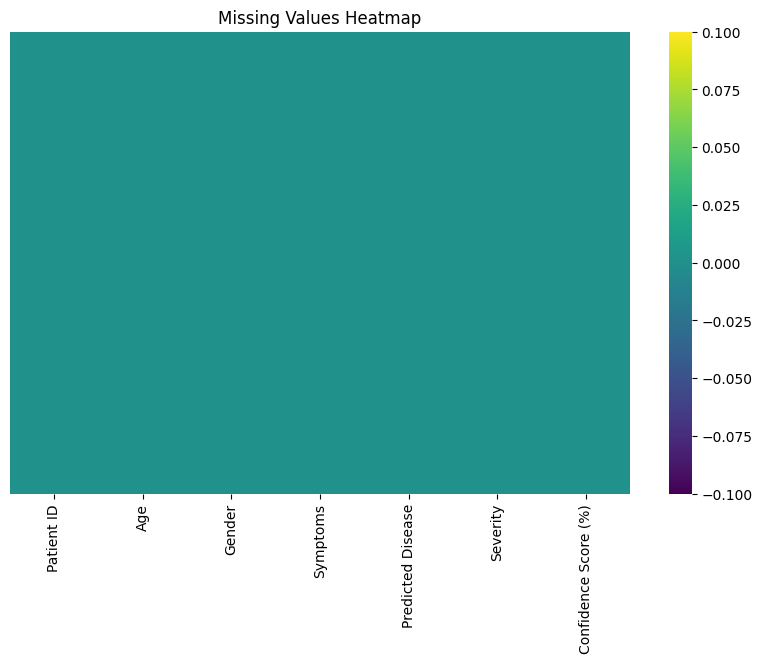

In [16]:
# Cell 15: Comprehensive EDA - Check for missing values in detail
print("=== MISSING VALUES ANALYSIS ===")
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
print(missing_info)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [17]:
# Cell 16: Check for duplicates
print("=== DUPLICATE ANALYSIS ===")
print(f"Number of duplicate rows: {df.duplicated().sum()}")
if df.duplicated().sum() > 0:
    print("\nDuplicate rows:")
    print(df[df.duplicated()])

=== DUPLICATE ANALYSIS ===
Number of duplicate rows: 0


In [18]:
# Cell 17: Analyze categorical columns in detail
print("=== CATEGORICAL VARIABLES ANALYSIS ===")
categorical_cols = ['Gender', 'Symptoms', 'Predicted Disease', 'Severity']

for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(f"Number of unique values: {df[col].nunique()}")
    print(f"Unique values: {df[col].unique()}")
    print(f"Value counts:")
    print(df[col].value_counts().head(10))

=== CATEGORICAL VARIABLES ANALYSIS ===

--- Gender ---
Number of unique values: 2
Unique values: ['Male' 'Female']
Value counts:
Gender
Male      522
Female    478
Name: count, dtype: int64

--- Symptoms ---
Number of unique values: 5
Unique values: ['Headache, Blurred Vision' 'Fever, Cough, Fatigue' 'Runny Nose, Sneezing'
 'Chest Pain, Breathlessness' 'Abdominal Pain, Vomiting']
Value counts:
Symptoms
Chest Pain, Breathlessness    223
Fever, Cough, Fatigue         222
Abdominal Pain, Vomiting      194
Headache, Blurred Vision      181
Runny Nose, Sneezing          180
Name: count, dtype: int64

--- Predicted Disease ---
Number of unique values: 5
Unique values: ['Migraine' 'Influenza' 'Common Cold' 'Heart Attack' 'Food Poisoning']
Value counts:
Predicted Disease
Heart Attack      223
Influenza         222
Food Poisoning    194
Migraine          181
Common Cold       180
Name: count, dtype: int64

--- Severity ---
Number of unique values: 3
Unique values: ['Severe' 'Mild' 'Moderate']
V

=== SYMPTOMS ANALYSIS ===
Top 20 most common individual symptoms:
Breathlessness    223
Chest Pain        223
Fever             222
Cough             222
Fatigue           222
Abdominal Pain    194
Vomiting          194
Blurred Vision    181
Headache          181
Sneezing          180
Runny Nose        180
Name: count, dtype: int64


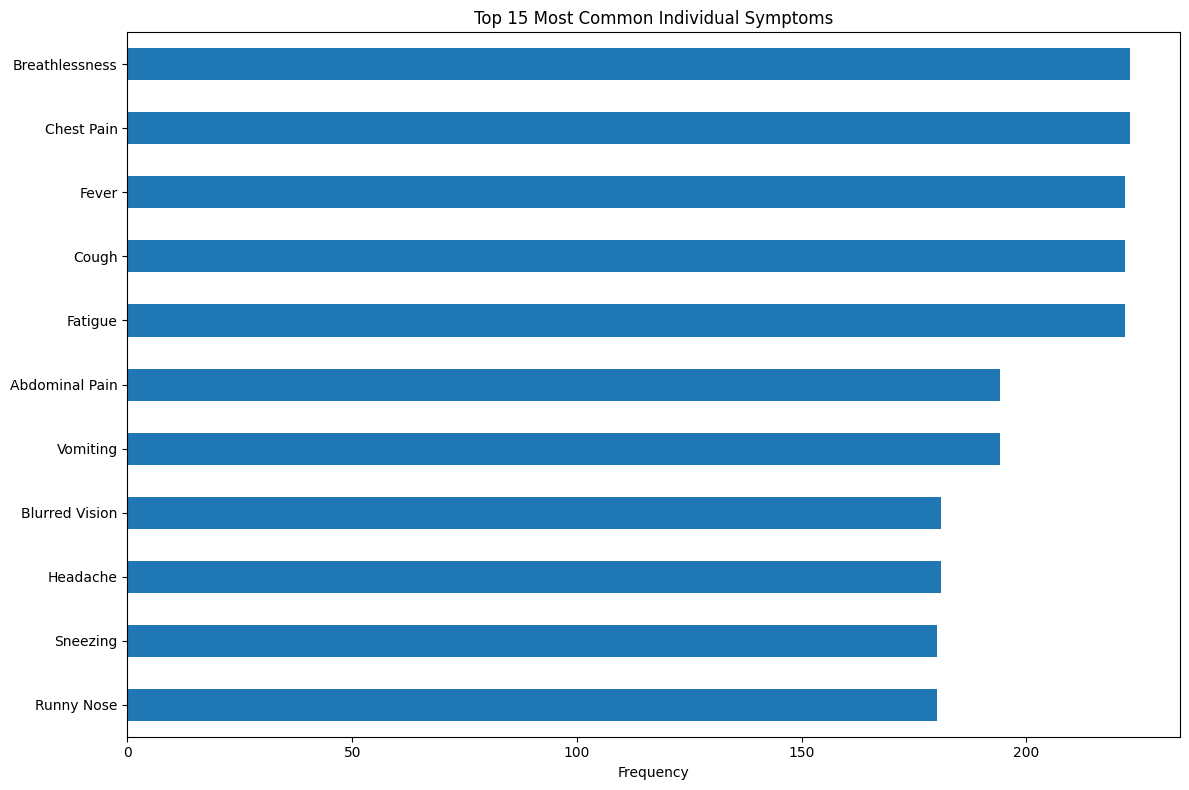

In [19]:
# Cell 18: Analyze Symptoms column in detail
print("=== SYMPTOMS ANALYSIS ===")
# Split symptoms and analyze individual symptoms
all_symptoms = []
for symptoms in df['Symptoms']:
    symptom_list = [s.strip() for s in symptoms.split(',')]
    all_symptoms.extend(symptom_list)

symptom_counts = pd.Series(all_symptoms).value_counts()
print("Top 20 most common individual symptoms:")
print(symptom_counts.head(20))

# Visualize top symptoms
plt.figure(figsize=(12, 8))
symptom_counts.head(15).plot(kind='barh')
plt.title('Top 15 Most Common Individual Symptoms')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

=== DISEASE DISTRIBUTION BY GENDER ===


<Figure size 1200x600 with 0 Axes>

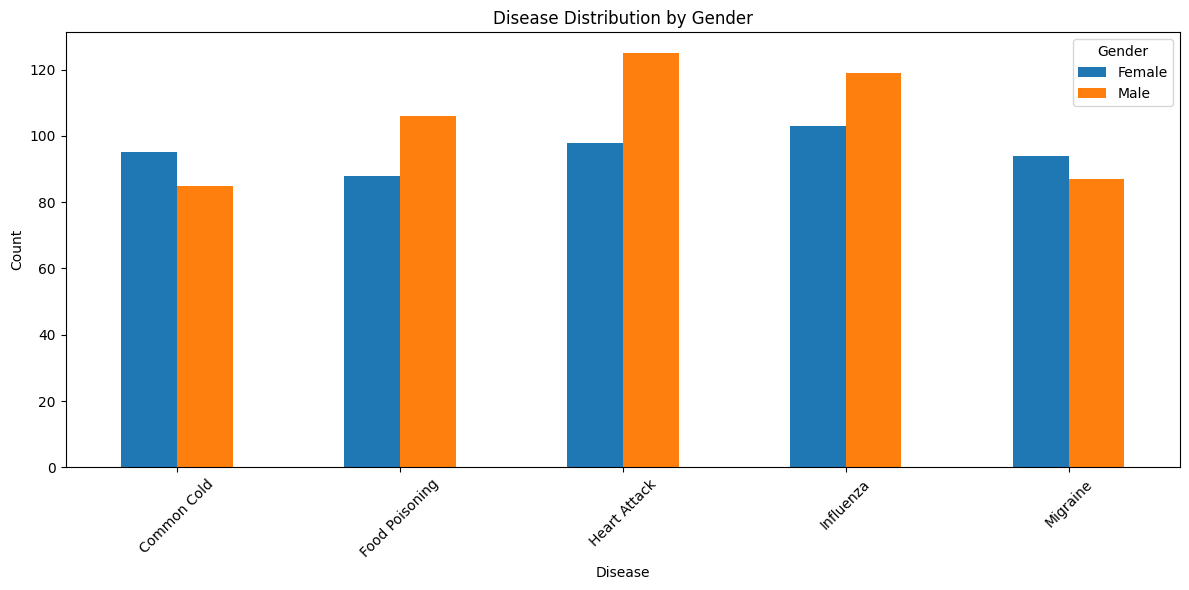

In [20]:
# Cell 19: Disease distribution by Gender
print("=== DISEASE DISTRIBUTION BY GENDER ===")
plt.figure(figsize=(12, 6))
pd.crosstab(df['Predicted Disease'], df['Gender']).plot(kind='bar', figsize=(12, 6))
plt.title('Disease Distribution by Gender')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

=== SEVERITY BY DISEASE ===


<Figure size 1200x600 with 0 Axes>

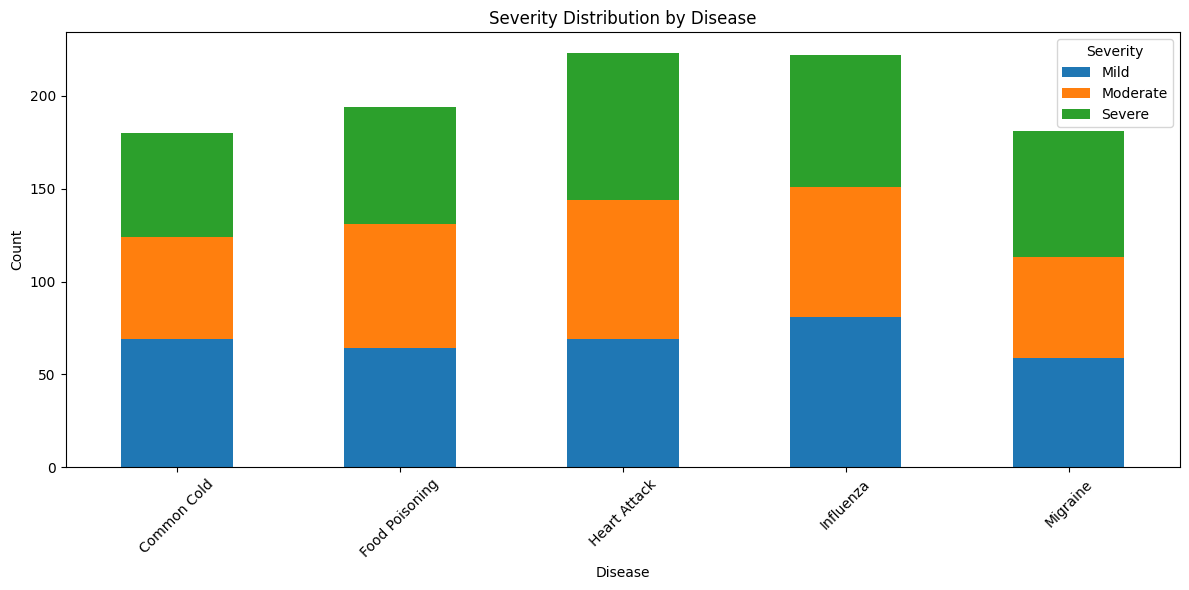

In [21]:
# Cell 20: Severity distribution by Disease
print("=== SEVERITY BY DISEASE ===")
plt.figure(figsize=(12, 6))
severity_disease = pd.crosstab(df['Predicted Disease'], df['Severity'])
severity_disease.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Severity Distribution by Disease')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

=== AGE DISTRIBUTION BY DISEASE ===


<Figure size 1200x600 with 0 Axes>

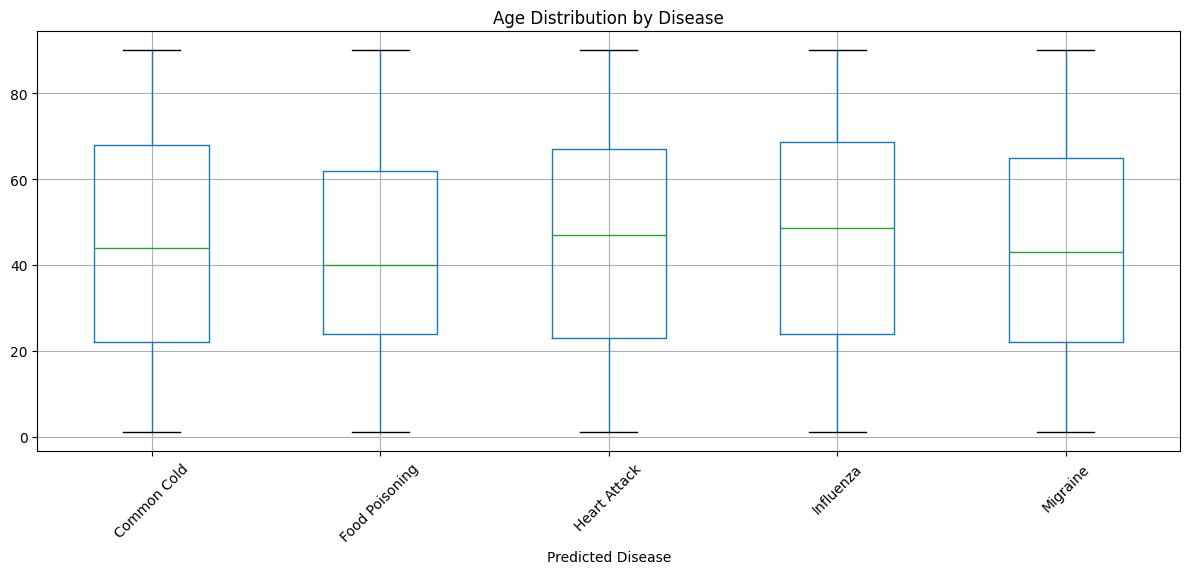

In [22]:
# Cell 21: Age distribution by Disease
print("=== AGE DISTRIBUTION BY DISEASE ===")
plt.figure(figsize=(12, 6))
df.boxplot(column='Age', by='Predicted Disease', figsize=(12, 6))
plt.title('Age Distribution by Disease')
plt.suptitle('')  # Remove automatic title
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== CONFIDENCE SCORE BY DISEASE ===


<Figure size 1200x600 with 0 Axes>

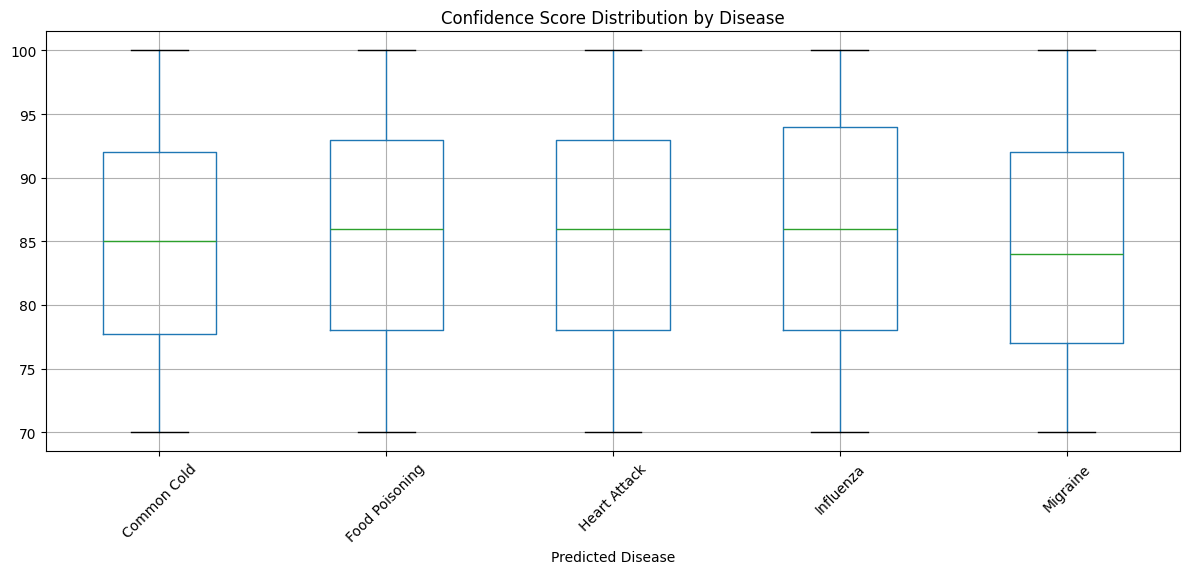

In [23]:
# Cell 22: Confidence Score analysis by Disease
print("=== CONFIDENCE SCORE BY DISEASE ===")
plt.figure(figsize=(12, 6))
df.boxplot(column='Confidence Score (%)', by='Predicted Disease', figsize=(12, 6))
plt.title('Confidence Score Distribution by Disease')
plt.suptitle('')  # Remove automatic title
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Cell 23: DATA PREPROCESSING - Drop unnecessary columns
print("=== DROPPING UNNECESSARY COLUMNS ===")
print("Original columns:", df.columns.tolist())

# Drop Patient ID as it's just an identifier
df_processed = df.drop('Patient ID', axis=1)

print("Columns after dropping Patient ID:", df_processed.columns.tolist())
print(f"Dataset shape after dropping: {df_processed.shape}")

=== DROPPING UNNECESSARY COLUMNS ===
Original columns: ['Patient ID', 'Age', 'Gender', 'Symptoms', 'Predicted Disease', 'Severity', 'Confidence Score (%)']
Columns after dropping Patient ID: ['Age', 'Gender', 'Symptoms', 'Predicted Disease', 'Severity', 'Confidence Score (%)']
Dataset shape after dropping: (1000, 6)


In [25]:
# Cell 24: Handle categorical variables - Label Encoding
print("=== HANDLING CATEGORICAL VARIABLES ===")

# Initialize label encoders
label_encoders = {}

# Encode Gender (binary)
gender_encoder = LabelEncoder()
df_processed['Gender_encoded'] = gender_encoder.fit_transform(df_processed['Gender'])
label_encoders['Gender'] = gender_encoder
print("Gender encoding:", dict(zip(gender_encoder.classes_, gender_encoder.transform(gender_encoder.classes_))))

# Encode Severity (ordinal - we'll use custom mapping for logical order)
severity_mapping = {'Mild': 0, 'Moderate': 1, 'Severe': 2}
df_processed['Severity_encoded'] = df_processed['Severity'].map(severity_mapping)
label_encoders['Severity'] = severity_mapping
print("Severity encoding:", severity_mapping)

# Encode Predicted Disease (target variable)
disease_encoder = LabelEncoder()
df_processed['Disease_encoded'] = disease_encoder.fit_transform(df_processed['Predicted Disease'])
label_encoders['Disease'] = disease_encoder
print("Disease encoding:", dict(zip(disease_encoder.classes_, disease_encoder.transform(disease_encoder.classes_))))

print("\nEncoded dataset sample:")
print(df_processed[['Gender', 'Gender_encoded', 'Severity', 'Severity_encoded',
                   'Predicted Disease', 'Disease_encoded']].head())

=== HANDLING CATEGORICAL VARIABLES ===
Gender encoding: {'Female': np.int64(0), 'Male': np.int64(1)}
Severity encoding: {'Mild': 0, 'Moderate': 1, 'Severe': 2}
Disease encoding: {'Common Cold': np.int64(0), 'Food Poisoning': np.int64(1), 'Heart Attack': np.int64(2), 'Influenza': np.int64(3), 'Migraine': np.int64(4)}

Encoded dataset sample:
   Gender  Gender_encoded Severity  Severity_encoded Predicted Disease  \
0    Male               1   Severe                 2          Migraine   
1  Female               0   Severe                 2          Migraine   
2  Female               0     Mild                 0         Influenza   
3    Male               1     Mild                 0       Common Cold   
4    Male               1     Mild                 0      Heart Attack   

   Disease_encoded  
0                4  
1                4  
2                3  
3                0  
4                2  


In [26]:
# Cell 25: Feature Engineering - Process Symptoms (One-Hot Encoding for individual symptoms)
print("=== PROCESSING SYMPTOMS FEATURE ===")

# Get all unique symptoms
all_symptoms_list = []
for symptoms in df_processed['Symptoms']:
    symptom_list = [s.strip().lower() for s in symptoms.split(',')]
    all_symptoms_list.extend(symptom_list)

unique_symptoms = list(set(all_symptoms_list))
print(f"Total unique symptoms: {len(unique_symptoms)}")
print("Unique symptoms:", unique_symptoms)

# Create binary features for each symptom
for symptom in unique_symptoms:
    df_processed[f'Symptom_{symptom.replace(" ", "_")}'] = df_processed['Symptoms'].apply(
        lambda x: 1 if symptom in [s.strip().lower() for s in x.split(',')] else 0
    )

print(f"Number of symptom features created: {len(unique_symptoms)}")
print("Sample of symptom features:")
symptom_columns = [col for col in df_processed.columns if col.startswith('Symptom_')]
print(df_processed[symptom_columns].sum().sort_values(ascending=False).head(10))

=== PROCESSING SYMPTOMS FEATURE ===
Total unique symptoms: 11
Unique symptoms: ['headache', 'runny nose', 'blurred vision', 'breathlessness', 'vomiting', 'sneezing', 'abdominal pain', 'fatigue', 'fever', 'chest pain', 'cough']
Number of symptom features created: 11
Sample of symptom features:
Symptom_breathlessness    223
Symptom_chest_pain        223
Symptom_fatigue           222
Symptom_cough             222
Symptom_fever             222
Symptom_abdominal_pain    194
Symptom_vomiting          194
Symptom_headache          181
Symptom_blurred_vision    181
Symptom_runny_nose        180
dtype: int64


In [27]:
# Cell 26: Prepare features and target for modeling
print("=== PREPARING FEATURES AND TARGET ===")

# Define feature columns
numeric_features = ['Age', 'Confidence Score (%)', 'Severity_encoded', 'Gender_encoded']
symptom_features = [col for col in df_processed.columns if col.startswith('Symptom_')]

# Combine all features
feature_columns = numeric_features + symptom_features
X = df_processed[feature_columns]
y = df_processed['Disease_encoded']

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Number of features: {len(feature_columns)}")
print(f"Feature names: {feature_columns[:5]} ... {feature_columns[-5:]}")  # Show first and last few

=== PREPARING FEATURES AND TARGET ===
Feature matrix shape: (1000, 15)
Target vector shape: (1000,)
Number of features: 15
Feature names: ['Age', 'Confidence Score (%)', 'Severity_encoded', 'Gender_encoded', 'Symptom_headache'] ... ['Symptom_abdominal_pain', 'Symptom_fatigue', 'Symptom_fever', 'Symptom_chest_pain', 'Symptom_cough']


In [28]:
# Cell 27: Feature Scaling
print("=== FEATURE SCALING ===")

# Initialize scaler
scaler = StandardScaler()

# Scale numeric features (Age, Confidence Score)
X_scaled = X.copy()
X_scaled[['Age', 'Confidence Score (%)']] = scaler.fit_transform(X[['Age', 'Confidence Score (%)']])

print("Feature scaling completed!")
print("Scaled features sample (first 5 rows):")
print(X_scaled[['Age', 'Confidence Score (%)']].head())

print("\nFeature statistics after scaling:")
print(f"Age - Mean: {X_scaled['Age'].mean():.2f}, Std: {X_scaled['Age'].std():.2f}")
print(f"Confidence Score - Mean: {X_scaled['Confidence Score (%)'].mean():.2f}, Std: {X_scaled['Confidence Score (%)'].std():.2f}")

=== FEATURE SCALING ===
Feature scaling completed!
Scaled features sample (first 5 rows):
        Age  Confidence Score (%)
0  0.929368             -1.719233
1 -0.669494              1.090522
2  0.890371              0.416181
3  1.475321             -0.932502
4 -1.410430              0.865742

Feature statistics after scaling:
Age - Mean: 0.00, Std: 1.00
Confidence Score - Mean: 0.00, Std: 1.00


In [29]:
# Cell 28: Final dataset overview before model training
print("=== FINAL DATASET OVERVIEW ===")
print(f"Final feature matrix shape: {X_scaled.shape}")
print(f"Target classes: {len(np.unique(y))}")
print(f"Target distribution:\n{pd.Series(y).value_counts().sort_index()}")

print("\nFeature types:")
print(f"Numeric features: {len(numeric_features)}")
print(f"Symptom features: {len(symptom_features)}")
print(f"Total features: {len(feature_columns)}")

# Check data types
print(f"\nData types in feature matrix:")
print(X_scaled.dtypes.value_counts())

=== FINAL DATASET OVERVIEW ===
Final feature matrix shape: (1000, 15)
Target classes: 5
Target distribution:
Disease_encoded
0    180
1    194
2    223
3    222
4    181
Name: count, dtype: int64

Feature types:
Numeric features: 4
Symptom features: 11
Total features: 15

Data types in feature matrix:
int64      13
float64     2
Name: count, dtype: int64


In [30]:
# Cell 29: Save processed data and encoders for future use
print("=== SAVING PROCESSED DATA ===")

# Save the processed dataframe
df_processed.to_csv('symptom_checker_processed.csv', index=False)

# Save the feature matrix and target
np.save('X_features.npy', X_scaled.values)
np.save('y_target.npy', y.values)

print("Processed data saved successfully!")
print("Files created:")
print("- symptom_checker_processed.csv")
print("- X_features.npy")
print("- y_target.npy")

=== SAVING PROCESSED DATA ===
Processed data saved successfully!
Files created:
- symptom_checker_processed.csv
- X_features.npy
- y_target.npy


In [31]:
# Cell 30: Split the data into training and testing sets
print("=== SPLITTING DATA ===")
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Number of classes: {len(np.unique(y))}")

# Convert to numpy arrays for TensorFlow
X_train = X_train.values
X_test = X_test.values

print("\nClass distribution in training set:")
print(pd.Series(y_train).value_counts().sort_index())
print("\nClass distribution in testing set:")
print(pd.Series(y_test).value_counts().sort_index())

=== SPLITTING DATA ===
Training set shape: (800, 15)
Testing set shape: (200, 15)
Number of classes: 5

Class distribution in training set:
Disease_encoded
0    144
1    155
2    178
3    178
4    145
Name: count, dtype: int64

Class distribution in testing set:
Disease_encoded
0    36
1    39
2    45
3    44
4    36
Name: count, dtype: int64


In [32]:
# Cell 31: Define multiple ANN architectures
print("=== DEFINING MULTIPLE ANN ARCHITECTURES ===")

def create_model_1():
    """Simple model with 1 hidden layer"""
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(len(np.unique(y)), activation='softmax')
    ])
    return model

def create_model_2():
    """Model with 2 hidden layers"""
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(len(np.unique(y)), activation='softmax')
    ])
    return model

def create_model_3():
    """Model with 3 hidden layers (deeper)"""
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dropout(0.4),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(len(np.unique(y)), activation='softmax')
    ])
    return model

def create_model_4():
    """Model with different activation functions"""
    model = keras.Sequential([
        layers.Dense(128, activation='tanh', input_shape=(X_train.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(64, activation='tanh'),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dense(len(np.unique(y)), activation='softmax')
    ])
    return model

def create_model_5():
    """Wider model with more neurons"""
    model = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(len(np.unique(y)), activation='softmax')
    ])
    return model

models = {
    'Model_1_Simple': create_model_1,
    'Model_2_2Layers': create_model_2,
    'Model_3_Deep': create_model_3,
    'Model_4_Tanh': create_model_4,
    'Model_5_Wide': create_model_5
}

print("ANN architectures defined successfully!")

=== DEFINING MULTIPLE ANN ARCHITECTURES ===
ANN architectures defined successfully!


In [33]:
# Cell 32: Compile and train all models
print("=== TRAINING ALL MODELS ===")

# Training parameters
epochs = 100
batch_size = 32

# Store model histories and trained models
model_histories = {}
trained_models = {}
results = {}

for model_name, model_func in models.items():
    print(f"\n--- Training {model_name} ---")

    # Create and compile model
    model = model_func()
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train model with early stopping
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=0
    )

    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=0
    )

    # Store model and history
    trained_models[model_name] = model
    model_histories[model_name] = history

    # Evaluate on train and test sets
    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    results[model_name] = {
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'train_loss': train_loss,
        'test_loss': test_loss,
        'epochs_trained': len(history.history['loss'])
    }

    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    print(f"Epochs trained: {len(history.history['loss'])}")

=== TRAINING ALL MODELS ===

--- Training Model_1_Simple ---
Train Accuracy: 1.0000, Test Accuracy: 1.0000
Epochs trained: 100

--- Training Model_2_2Layers ---
Train Accuracy: 1.0000, Test Accuracy: 1.0000
Epochs trained: 100

--- Training Model_3_Deep ---
Train Accuracy: 1.0000, Test Accuracy: 1.0000
Epochs trained: 100

--- Training Model_4_Tanh ---
Train Accuracy: 1.0000, Test Accuracy: 1.0000
Epochs trained: 100

--- Training Model_5_Wide ---
Train Accuracy: 1.0000, Test Accuracy: 1.0000
Epochs trained: 100


=== MODEL COMPARISON ===
Model Performance Comparison:
                 train_accuracy  test_accuracy    train_loss     test_loss  \
Model_1_Simple              1.0            1.0  1.450305e-04  1.531866e-04   
Model_2_2Layers             1.0            1.0  2.563284e-06  2.583252e-06   
Model_3_Deep                1.0            1.0  3.620982e-08  4.112719e-08   
Model_4_Tanh                1.0            1.0  1.096015e-05  1.128365e-05   
Model_5_Wide                1.0            1.0  1.743436e-08  1.788139e-08   

                 epochs_trained  
Model_1_Simple            100.0  
Model_2_2Layers           100.0  
Model_3_Deep              100.0  
Model_4_Tanh              100.0  
Model_5_Wide              100.0  


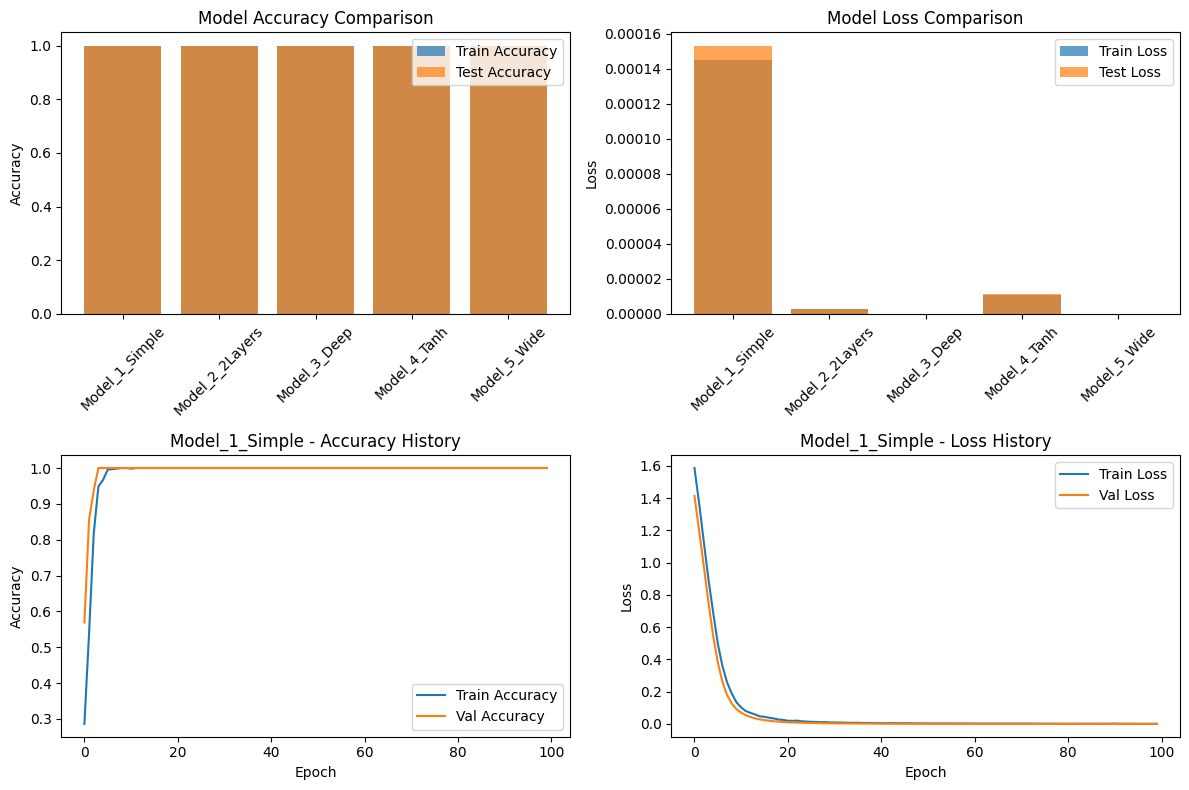


Best Model: Model_1_Simple
Test Accuracy: 1.0000


In [34]:
# Cell 33: Compare model performances
print("=== MODEL COMPARISON ===")
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('test_accuracy', ascending=False)

print("Model Performance Comparison:")
print(results_df)

# Visualize comparison
plt.figure(figsize=(12, 8))

# Accuracy comparison
plt.subplot(2, 2, 1)
plt.bar(results_df.index, results_df['train_accuracy'], alpha=0.7, label='Train Accuracy')
plt.bar(results_df.index, results_df['test_accuracy'], alpha=0.7, label='Test Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.legend()
plt.ylabel('Accuracy')

# Loss comparison
plt.subplot(2, 2, 2)
plt.bar(results_df.index, results_df['train_loss'], alpha=0.7, label='Train Loss')
plt.bar(results_df.index, results_df['test_loss'], alpha=0.7, label='Test Loss')
plt.title('Model Loss Comparison')
plt.xticks(rotation=45)
plt.legend()
plt.ylabel('Loss')

# Training history for best model
best_model_name = results_df.index[0]
plt.subplot(2, 2, 3)
plt.plot(model_histories[best_model_name].history['accuracy'], label='Train Accuracy')
plt.plot(model_histories[best_model_name].history['val_accuracy'], label='Val Accuracy')
plt.title(f'{best_model_name} - Accuracy History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(model_histories[best_model_name].history['loss'], label='Train Loss')
plt.plot(model_histories[best_model_name].history['val_loss'], label='Val Loss')
plt.title(f'{best_model_name} - Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\nBest Model: {best_model_name}")
print(f"Test Accuracy: {results_df.loc[best_model_name, 'test_accuracy']:.4f}")

In [35]:
# Cell 34: Detailed evaluation of the best model
print("=== DETAILED EVALUATION OF BEST MODEL ===")
best_model = trained_models[best_model_name]

# Get predictions
y_pred_proba = best_model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Calculate metrics
train_accuracy = results_df.loc[best_model_name, 'train_accuracy']
test_accuracy = results_df.loc[best_model_name, 'test_accuracy']

print(f"Best Model: {best_model_name}")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Accuracy Difference: {abs(train_accuracy - test_accuracy):.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=disease_encoder.classes_))

=== DETAILED EVALUATION OF BEST MODEL ===
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Best Model: Model_1_Simple
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
Accuracy Difference: 0.0000

Classification Report:
                precision    recall  f1-score   support

   Common Cold       1.00      1.00      1.00        36
Food Poisoning       1.00      1.00      1.00        39
  Heart Attack       1.00      1.00      1.00        45
     Influenza       1.00      1.00      1.00        44
      Migraine       1.00      1.00      1.00        36

      accuracy                           1.00       200
     macro avg       1.00      1.00      1.00       200
  weighted avg       1.00      1.00      1.00       200



In [36]:
# Cell 34: Detailed evaluation of the best model
print("=== DETAILED EVALUATION OF BEST MODEL ===")
best_model = trained_models[best_model_name]

# Get predictions
y_pred_proba = best_model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Calculate metrics
train_accuracy = results_df.loc[best_model_name, 'train_accuracy']
test_accuracy = results_df.loc[best_model_name, 'test_accuracy']

print(f"Best Model: {best_model_name}")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Accuracy Difference: {abs(train_accuracy - test_accuracy):.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=disease_encoder.classes_))

=== DETAILED EVALUATION OF BEST MODEL ===
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Best Model: Model_1_Simple
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
Accuracy Difference: 0.0000

Classification Report:
                precision    recall  f1-score   support

   Common Cold       1.00      1.00      1.00        36
Food Poisoning       1.00      1.00      1.00        39
  Heart Attack       1.00      1.00      1.00        45
     Influenza       1.00      1.00      1.00        44
      Migraine       1.00      1.00      1.00        36

      accuracy                           1.00       200
     macro avg       1.00      1.00      1.00       200
  weighted avg       1.00      1.00      1.00       200



=== CONFUSION MATRIX ===


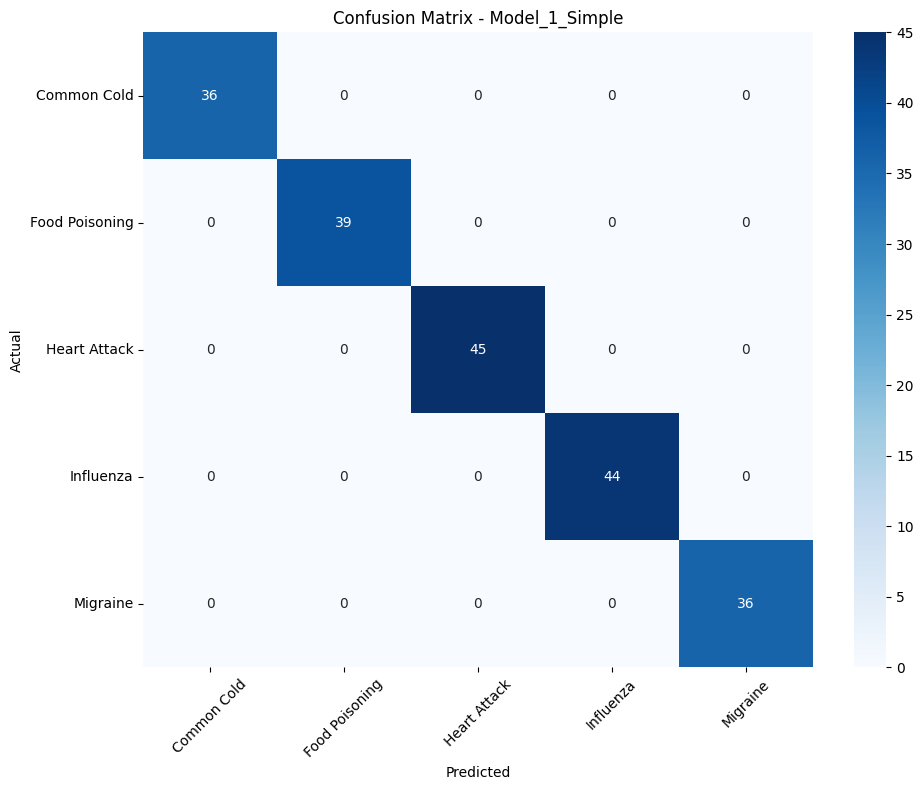


Class-wise Metrics:
          Disease  Precision  Recall  F1-Score  Support
0     Common Cold        1.0     1.0       1.0       36
1  Food Poisoning        1.0     1.0       1.0       39
2    Heart Attack        1.0     1.0       1.0       45
3       Influenza        1.0     1.0       1.0       44
4        Migraine        1.0     1.0       1.0       36


In [37]:
# Cell 35: Confusion Matrix
print("=== CONFUSION MATRIX ===")

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=disease_encoder.classes_,
            yticklabels=disease_encoder.classes_)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate precision, recall, f1 for each class
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average=None)

class_metrics = pd.DataFrame({
    'Disease': disease_encoder.classes_,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
})

print("\nClass-wise Metrics:")
print(class_metrics)

In [38]:
# Cell 36: Save the best model as .h5 file
print("=== SAVING BEST MODEL ===")

# Save TensorFlow model
best_model.save('best_symptom_checker_model.h5')
print("Best model saved as 'best_symptom_checker_model.h5'")

# Save label encoders and scaler using joblib
import joblib

# Save encoders and scaler
joblib.dump({
    'disease_encoder': disease_encoder,
    'gender_encoder': gender_encoder,
    'severity_mapping': severity_mapping,
    'scaler': scaler,
    'feature_columns': feature_columns,
    'symptom_columns': symptom_columns
}, 'preprocessing_objects.joblib')

print("Preprocessing objects saved as 'preprocessing_objects.joblib'")

=== SAVING BEST MODEL ===
Best model saved as 'best_symptom_checker_model.h5'
Preprocessing objects saved as 'preprocessing_objects.joblib'


In [39]:
# Cell 37: Verify saved model can be loaded and used
print("=== VERIFYING SAVED MODEL ===")

# Load the saved model
loaded_model = keras.models.load_model('best_symptom_checker_model.h5')
loaded_objects = joblib.load('preprocessing_objects.joblib')

print("Model and objects loaded successfully!")

# Test prediction with loaded model
sample_idx = 0
sample_input = X_test[sample_idx:sample_idx+1]
sample_pred = loaded_model.predict(sample_input)
sample_pred_class = np.argmax(sample_pred, axis=1)[0]

print(f"\nSample Prediction Test:")
print(f"Input shape: {sample_input.shape}")
print(f"Predicted probabilities: {sample_pred[0]}")
print(f"Predicted class: {sample_pred_class}")
print(f"Predicted disease: {loaded_objects['disease_encoder'].inverse_transform([sample_pred_class])[0]}")
print(f"Actual disease: {disease_encoder.inverse_transform([y_test.iloc[sample_idx]])[0]}")

=== VERIFYING SAVED MODEL ===
Model and objects loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step

Sample Prediction Test:
Input shape: (1, 15)
Predicted probabilities: [9.7357961e-06 1.7265580e-05 9.9993634e-01 1.1199155e-05 2.5394906e-05]
Predicted class: 2
Predicted disease: Heart Attack
Actual disease: Heart Attack


In [40]:
# Cell 38: Final summary and model architecture
print("=== FINAL SUMMARY ===")

print(f"\nBEST MODEL: {best_model_name}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

print(f"\nModel Architecture:")
best_model.summary()

print(f"\nFiles Created:")
print("1. best_symptom_checker_model.h5 - TensorFlow model")
print("2. preprocessing_objects.joblib - Encoders and scaler")
print("3. symptom_checker_processed.csv - Processed dataset")
print("4. X_features.npy - Feature matrix")
print("5. y_target.npy - Target vector")

print(f"\nModel Performance Overview:")
for model_name, result in results.items():
    print(f"{model_name}: Train Acc={result['train_accuracy']:.4f}, Test Acc={result['test_accuracy']:.4f}")

=== FINAL SUMMARY ===

BEST MODEL: Model_1_Simple
Test Accuracy: 1.0000
Training Accuracy: 1.0000

Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,049 (15.82 KB)

 Trainable params: 1,349 (5.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,700 (10.55 KB)


Files Created:
1. best_symptom_checker_model.h5 - TensorFlow model
2. preprocessing_objects.joblib - Encoders and scaler
3. symptom_checker_processed.csv - Processed dataset
4. X_features.npy - Feature matrix
5. y_target.npy - Target vector

Model Performance Overview:
Model_1_Simple: Train Acc=1.0000, Test Acc=1.0000
Model_2_2Layers: Train Acc=1.0000, Test Acc=1.0000
Model_3_Deep: Train Acc=1.0000, Test Acc=1.0000
Model_4_Tanh: Train Acc=1.0000, Test Acc=1.0000
Model_5_Wide: Train Acc=1.0000, Test Acc=1.0000


In [41]:
# Cell 39: Create a function for making single predictions
print("=== CREATING PREDICTION FUNCTION ===")

def predict_disease(symptoms, age, gender, confidence_score=85, severity='Moderate'):
    """
    Predict disease based on symptoms and patient information

    Parameters:
    - symptoms: list of symptoms (e.g., ['Fever', 'Cough'])
    - age: patient age (int)
    - gender: 'Male' or 'Female'
    - confidence_score: confidence score percentage (default: 85)
    - severity: 'Mild', 'Moderate', or 'Severe' (default: 'Moderate')
    """

    # Load the saved model and preprocessing objects
    model = keras.models.load_model('best_symptom_checker_model.h5')
    preprocessing_objects = joblib.load('preprocessing_objects.joblib')

    # Extract objects
    disease_encoder = preprocessing_objects['disease_encoder']
    gender_encoder = preprocessing_objects['gender_encoder']
    severity_mapping = preprocessing_objects['severity_mapping']
    scaler = preprocessing_objects['scaler']
    feature_columns = preprocessing_objects['feature_columns']
    symptom_columns = preprocessing_objects['symptom_columns']

    # Create feature vector
    feature_vector = np.zeros(len(feature_columns))

    # Fill numeric features
    feature_dict = {
        'Age': age,
        'Confidence Score (%)': confidence_score,
        'Severity_encoded': severity_mapping[severity],
        'Gender_encoded': gender_encoder.transform([gender])[0]
    }

    # Fill symptom features
    for symptom in symptoms:
        symptom_feature_name = f"Symptom_{symptom.lower().replace(' ', '_')}"
        if symptom_feature_name in feature_columns:
            idx = feature_columns.index(symptom_feature_name)
            feature_vector[idx] = 1

    # Fill other features
    for i, col in enumerate(feature_columns):
        if col in feature_dict:
            idx = feature_columns.index(col)
            feature_vector[idx] = feature_dict[col]

    # Scale numeric features (Age and Confidence Score)
    feature_vector_scaled = feature_vector.copy()
    age_idx = feature_columns.index('Age')
    confidence_idx = feature_columns.index('Confidence Score (%)')

    # Reshape for scaling
    numeric_features = feature_vector[[age_idx, confidence_idx]].reshape(1, -1)
    numeric_features_scaled = scaler.transform(numeric_features)

    # Update scaled values
    feature_vector_scaled[age_idx] = numeric_features_scaled[0, 0]
    feature_vector_scaled[confidence_idx] = numeric_features_scaled[0, 1]

    # Make prediction
    prediction_proba = model.predict(feature_vector_scaled.reshape(1, -1))
    predicted_class = np.argmax(prediction_proba, axis=1)[0]
    predicted_disease = disease_encoder.inverse_transform([predicted_class])[0]
    confidence = prediction_proba[0][predicted_class] * 100

    # Get top 3 predictions
    top_3_indices = np.argsort(prediction_proba[0])[-3:][::-1]
    top_3_diseases = disease_encoder.inverse_transform(top_3_indices)
    top_3_confidences = prediction_proba[0][top_3_indices] * 100

    return {
        'predicted_disease': predicted_disease,
        'confidence': confidence,
        'all_predictions': list(zip(disease_encoder.classes_, prediction_proba[0] * 100)),
        'top_3_predictions': list(zip(top_3_diseases, top_3_confidences)),
        'feature_vector': feature_vector_scaled
    }

=== CREATING PREDICTION FUNCTION ===


In [42]:
# Cell 40: Test the prediction function with sample data
print("=== TESTING PREDICTION FUNCTION ===")

# Test case 1: Common Cold symptoms
print("Test Case 1: Common Cold")
result1 = predict_disease(
    symptoms=['Runny Nose', 'Sneezing'],
    age=25,
    gender='Male',
    confidence_score=85,
    severity='Mild'
)

print(f"Predicted Disease: {result1['predicted_disease']}")
print(f"Confidence: {result1['confidence']:.2f}%")
print(f"Top 3 Predictions:")
for disease, conf in result1['top_3_predictions']:
    print(f"  - {disease}: {conf:.2f}%")
print()

=== TESTING PREDICTION FUNCTION ===
Test Case 1: Common Cold
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted Disease: Common Cold
Confidence: 99.99%
Top 3 Predictions:
  - Common Cold: 99.99%
  - Food Poisoning: 0.00%
  - Influenza: 0.00%



In [43]:
# Cell 41: More test cases
print("=== MORE TEST CASES ===")

# Test case 2: Influenza symptoms
print("Test Case 2: Influenza")
result2 = predict_disease(
    symptoms=['Fever', 'Cough', 'Fatigue'],
    age=30,
    gender='Female',
    confidence_score=90,
    severity='Moderate'
)

print(f"Predicted Disease: {result2['predicted_disease']}")
print(f"Confidence: {result2['confidence']:.2f}%")
print(f"Top 3 Predictions:")
for disease, conf in result2['top_3_predictions']:
    print(f"  - {disease}: {conf:.2f}%")
print()

=== MORE TEST CASES ===
Test Case 2: Influenza
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted Disease: Influenza
Confidence: 99.99%
Top 3 Predictions:
  - Influenza: 99.99%
  - Migraine: 0.00%
  - Common Cold: 0.00%



In [44]:
# Cell 44: Test case 5: Heart Attack symptoms
print("Test Case 5: Heart Attack")
result5 = predict_disease(
    symptoms=['Chest Pain', 'Breathlessness'],
    age=45,
    gender='Male',
    confidence_score=95,
    severity='Severe'
)

print(f"Predicted Disease: {result5['predicted_disease']}")
print(f"Confidence: {result5['confidence']:.2f}%")
print(f"Top 3 Predictions:")
for disease, conf in result5['top_3_predictions']:
    print(f"  - {disease}: {conf:.2f}%")
print()

Test Case 5: Heart Attack
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted Disease: Heart Attack
Confidence: 100.00%
Top 3 Predictions:
  - Heart Attack: 100.00%
  - Food Poisoning: 0.00%
  - Influenza: 0.00%



In [45]:
# Cell 45: Create an interactive prediction function
print("=== INTERACTIVE PREDICTION FUNCTION ===")

def interactive_prediction():
    """
    Interactive function to get user input and make predictions
    """
    print("=== SYMPTOM CHECKER ===")
    print("Available symptoms: Fever, Cough, Fatigue, Runny Nose, Sneezing, Headache, Blurred Vision, Abdominal Pain, Vomiting, Chest Pain, Breathlessness")

    # Get user input
    symptoms_input = input("Enter symptoms (comma-separated): ")
    symptoms = [s.strip() for s in symptoms_input.split(',')]

    age = int(input("Enter age: "))
    gender = input("Enter gender (Male/Female): ")
    severity = input("Enter severity (Mild/Moderate/Severe): ")
    confidence = float(input("Enter confidence score (0-100): "))

    # Make prediction
    result = predict_disease(
        symptoms=symptoms,
        age=age,
        gender=gender,
        confidence_score=confidence,
        severity=severity
    )

    print("\n" + "="*50)
    print("PREDICTION RESULTS:")
    print("="*50)
    print(f"Primary Prediction: {result['predicted_disease']}")
    print(f"Confidence: {result['confidence']:.2f}%")
    print(f"Patient: {age}y/o {gender}, Severity: {severity}")
    print(f"Symptoms: {', '.join(symptoms)}")

    print("\nTop 3 Possible Conditions:")
    for i, (disease, conf) in enumerate(result['top_3_predictions'], 1):
        print(f"{i}. {disease}: {conf:.2f}%")

    print("\nAll Predictions:")
    for disease, conf in sorted(result['all_predictions'], key=lambda x: x[1], reverse=True):
        print(f"  - {disease}: {conf:.2f}%")

# Uncomment the line below to run interactive prediction
# interactive_prediction()

=== INTERACTIVE PREDICTION FUNCTION ===


In [46]:
# Cell 46: Create a simplified prediction function for quick use
print("=== SIMPLIFIED PREDICTION FUNCTION ===")

def quick_predict(symptoms_list, age, gender):
    """
    Quick prediction with default parameters
    """
    result = predict_disease(
        symptoms=symptoms_list,
        age=age,
        gender=gender,
        confidence_score=85,
        severity='Moderate'
    )

    print(f"Predicted: {result['predicted_disease']} ({result['confidence']:.1f}% confidence)")
    print("Other possibilities:")
    for disease, conf in result['top_3_predictions'][1:]:
        print(f"  - {disease}: {conf:.1f}%")

    return result

# Test quick prediction
print("Quick Prediction Test:")
quick_result = quick_predict(
    symptoms_list=['Fever', 'Cough'],
    age=25,
    gender='Female'
)

=== SIMPLIFIED PREDICTION FUNCTION ===
Quick Prediction Test:


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted: Influenza (99.8% confidence)
Other possibilities:
  - Common Cold: 0.1%
  - Migraine: 0.0%


In [47]:
# Cell 48: Create a prediction summary report
print("=== PREDICTION SUMMARY REPORT ===")

def prediction_report(symptoms, age, gender, confidence_score=85, severity='Moderate'):
    """
    Generate a detailed prediction report
    """
    result = predict_disease(symptoms, age, gender, confidence_score, severity)

    report = f"""
PREDICTION REPORT
================

PATIENT INFORMATION:
- Age: {age}
- Gender: {gender}
- Severity: {severity}
- Symptoms: {', '.join(symptoms)}

PREDICTION RESULTS:
- Primary Diagnosis: {result['predicted_disease']}
- Confidence Level: {result['confidence']:.2f}%

DIFFERENTIAL DIAGNOSIS:
"""

    for i, (disease, conf) in enumerate(result['top_3_predictions'], 1):
        report += f"{i}. {disease}: {conf:.2f}%\n"

    report += f"""
CONFIDENCE BREAKDOWN:
"""
    for disease, conf in sorted(result['all_predictions'], key=lambda x: x[1], reverse=True):
        report += f"- {disease}: {conf:.2f}%\n"

    return report

# Generate a sample report
sample_report = prediction_report(
    symptoms=['Headache', 'Blurred Vision', 'Fatigue'],
    age=42,
    gender='Male',
    severity='Severe'
)

print(sample_report)

=== PREDICTION SUMMARY REPORT ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step

PREDICTION REPORT

PATIENT INFORMATION:
- Age: 42
- Gender: Male
- Severity: Severe
- Symptoms: Headache, Blurred Vision, Fatigue

PREDICTION RESULTS:
- Primary Diagnosis: Migraine
- Confidence Level: 99.98%

DIFFERENTIAL DIAGNOSIS:
1. Migraine: 99.98%
2. Influenza: 0.02%
3. Heart Attack: 0.00%

CONFIDENCE BREAKDOWN:
- Migraine: 99.98%
- Influenza: 0.02%
- Heart Attack: 0.00%
- Food Poisoning: 0.00%
- Common Cold: 0.00%



In [48]:
# Cell 49: Save the prediction functions for future use
print("=== SAVING PREDICTION FUNCTIONS ===")

# Save all prediction functions to a Python file
prediction_code = '''
import numpy as np
import tensorflow as tf
from tensorflow import keras
import joblib

def load_symptom_checker_model():
    """Load the saved model and preprocessing objects"""
    model = keras.models.load_model('best_symptom_checker_model.h5')
    preprocessing_objects = joblib.load('preprocessing_objects.joblib')
    return model, preprocessing_objects

def predict_disease(symptoms, age, gender, confidence_score=85, severity='Moderate'):
    """Predict disease based on symptoms and patient information"""
    model, preprocessing_objects = load_symptom_checker_model()

    disease_encoder = preprocessing_objects['disease_encoder']
    gender_encoder = preprocessing_objects['gender_encoder']
    severity_mapping = preprocessing_objects['severity_mapping']
    scaler = preprocessing_objects['scaler']
    feature_columns = preprocessing_objects['feature_columns']

    # Create feature vector
    feature_vector = np.zeros(len(feature_columns))

    # Fill features
    feature_dict = {
        'Age': age,
        'Confidence Score (%)': confidence_score,
        'Severity_encoded': severity_mapping[severity],
        'Gender_encoded': gender_encoder.transform([gender])[0]
    }

    for symptom in symptoms:
        symptom_feature_name = f"Symptom_{symptom.lower().replace(' ', '_')}"
        if symptom_feature_name in feature_columns:
            idx = feature_columns.index(symptom_feature_name)
            feature_vector[idx] = 1

    for i, col in enumerate(feature_columns):
        if col in feature_dict:
            idx = feature_columns.index(col)
            feature_vector[idx] = feature_dict[col]

    # Scale numeric features
    feature_vector_scaled = feature_vector.copy()
    age_idx = feature_columns.index('Age')
    confidence_idx = feature_columns.index('Confidence Score (%)')

    numeric_features = feature_vector[[age_idx, confidence_idx]].reshape(1, -1)
    numeric_features_scaled = scaler.transform(numeric_features)

    feature_vector_scaled[age_idx] = numeric_features_scaled[0, 0]
    feature_vector_scaled[confidence_idx] = numeric_features_scaled[0, 1]

    # Make prediction
    prediction_proba = model.predict(feature_vector_scaled.reshape(1, -1))
    predicted_class = np.argmax(prediction_proba, axis=1)[0]
    predicted_disease = disease_encoder.inverse_transform([predicted_class])[0]
    confidence = prediction_proba[0][predicted_class] * 100

    # Get top 3 predictions
    top_3_indices = np.argsort(prediction_proba[0])[-3:][::-1]
    top_3_diseases = disease_encoder.inverse_transform(top_3_indices)
    top_3_confidences = prediction_proba[0][top_3_indices] * 100

    return {
        'predicted_disease': predicted_disease,
        'confidence': confidence,
        'all_predictions': list(zip(disease_encoder.classes_, prediction_proba[0] * 100)),
        'top_3_predictions': list(zip(top_3_diseases, top_3_confidences))
    }
'''

with open('symptom_predictor.py', 'w') as f:
    f.write(prediction_code)

print("Prediction functions saved as 'symptom_predictor.py'")
print("You can now use these functions in other projects!")

=== SAVING PREDICTION FUNCTIONS ===
Prediction functions saved as 'symptom_predictor.py'
You can now use these functions in other projects!
